In [73]:
# import pandas, random, numpy, load dataset and saved into loc_data.
import pandas as pd 
import random
import numpy as np
import time
loc_data = pd.read_csv("worldcities.csv")

In [74]:
# reference: https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
# select columns lng, lat from dataset loc_data.
loc_data = loc_data[['lng', 'lat']]
loc_data

lng      lat
0      139.6922  35.6897
1      106.8451  -6.2146
2       77.2300  28.6600
3       72.8333  18.9667
4      120.9833  14.6000
...         ...      ...
40996  139.5000  57.3670
40997   71.3333  63.6667
40998  -17.8000  81.7166
40999  -42.2167  62.5333
41000  111.5100  74.0165

[41001 rows x 2 columns]

In [75]:
# reference: https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points
# Haversine formula
from math import radians, cos, sin, asin, sqrt

def haversine(lng1, lat1, lng2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lng1, lat1, lng2, lat2 = map(radians, [lng1, lat1, lng2, lat2])

    # haversine formula 
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [76]:
# function centers() is used to find the cluster center by k-means clustering.
def centers(df, k):
    pts = [np.array(pt) for pt in zip(df['lat'], df['lng'])]
    centers = random.sample(pts, k)
    old_cluster_ids, cluster_ids = None, [] # arbitrary but different
    while cluster_ids != old_cluster_ids:
        old_cluster_ids = list(cluster_ids)
        cluster_ids = []
        for pt in pts:
            min_cluster = - 1
            min_dist = float('inf')
            for i, center in enumerate(centers):
                # use Haversine function here.
                dist = haversine(pt[1], pt[0], center[1], center[0])
                if dist < min_dist:
                    min_cluster = i
                    min_dist = dist
            cluster_ids.append(min_cluster)
        df['cluster'] = cluster_ids
        cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
                        for match in range(k)]
        centers = [sum(pts)/len(pts) for pts in cluster_pts]
        
    return df['cluster']

In [77]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [78]:
lngs = list(loc_data['lng'])
lats = list(loc_data['lat'])

In [79]:
# function draw_figure() is used to visualize results with a color-coded scatter plot.
# reference: https://matplotlib.org/basemap/api/basemap_api.html, https://matplotlib.org/basemap/users/robin.html
def draw_figure(cluster,k):
    plt.figure(figsize=(15,9))
    map = Basemap(projection='robin', lat_0 = 0, lon_0 = 0, resolution = 'c')
    # draw coastlines.
    map.drawcoastlines()
    # convert to map projection coordinates.
    x, y = map(lngs, lats)
    map.scatter(x, y, c = cluster, cmap = 'jet', s = 0.6, alpha = 0.3 )
    map.drawmapboundary(fill_color='aqua')
    plt.title(f"Distribution of world cities when k = {k}", color = 'white', fontsize = 15)
    plt.show()

In [80]:
# function runtime() is used to record the runtime of k-means cluster.
def runtime(k):
    times = []
    start = time.time()
    cluster = list(centers(loc_data,k))
    end = time.time()
    times.append(end - start)
    print (f"The runtime when k = {k} is {times[0]} second.")
    return cluster

The runtime when k = 5 is 7.2759997844696045 second.


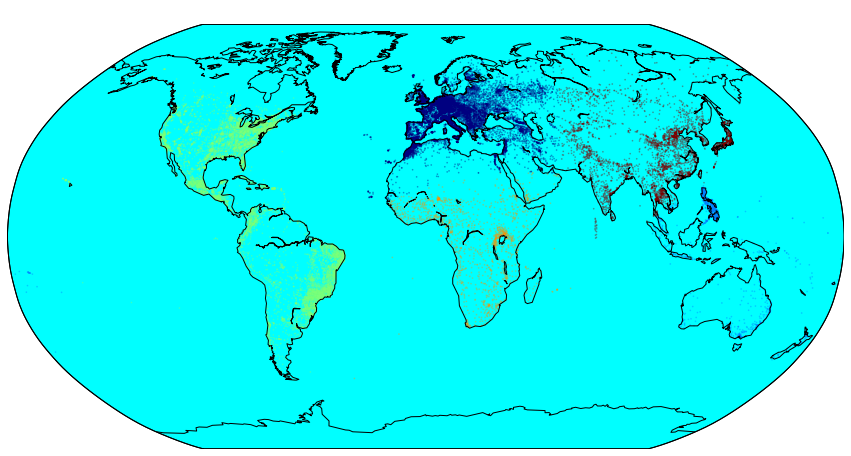

The runtime when k = 7 is 19.217384815216064 second.


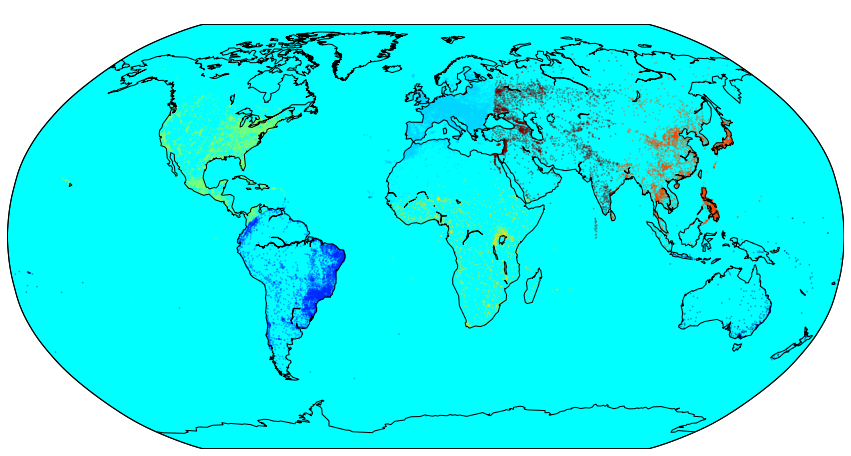

The runtime when k = 15 is 48.69068002700806 second.


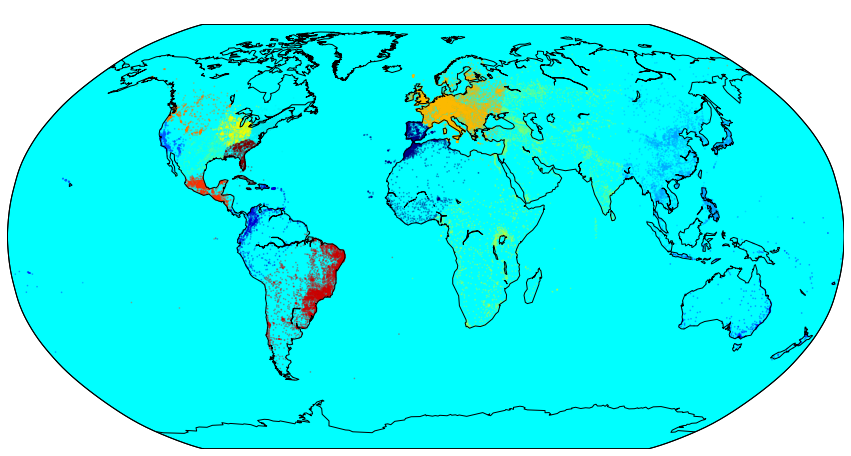

The runtime when k = 5 is 18.730501651763916 second.


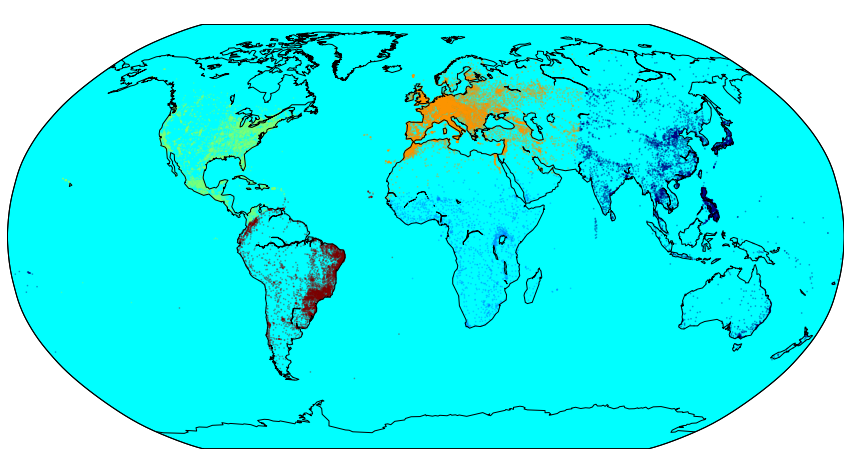

The runtime when k = 7 is 27.181627988815308 second.


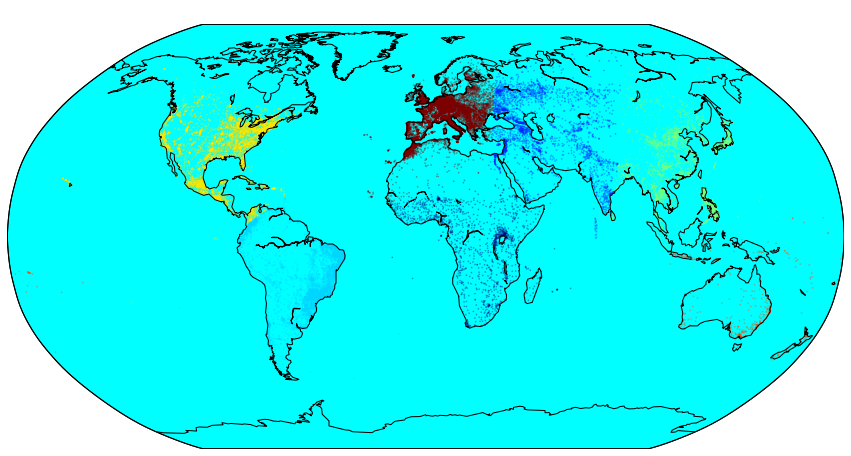

The runtime when k = 15 is 32.72863173484802 second.


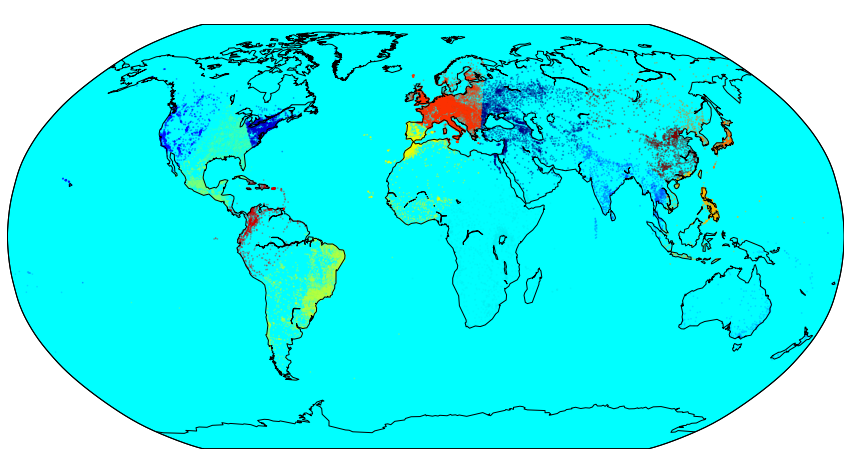

The runtime when k = 5 is 4.157338380813599 second.


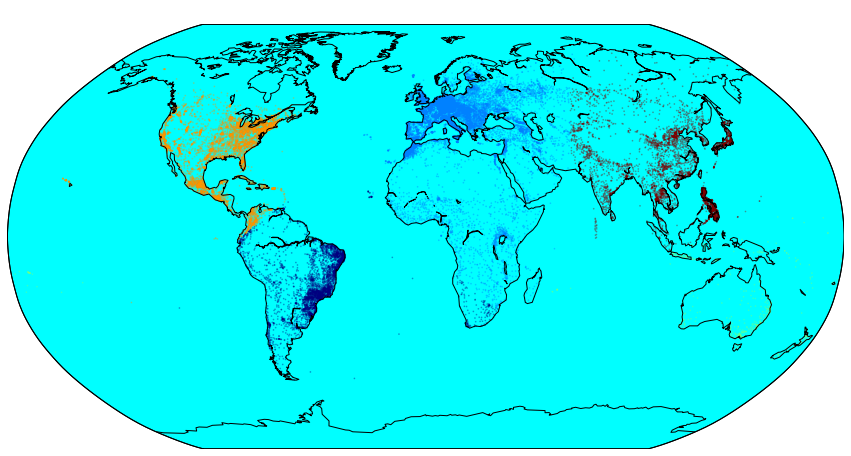

The runtime when k = 7 is 21.20393133163452 second.


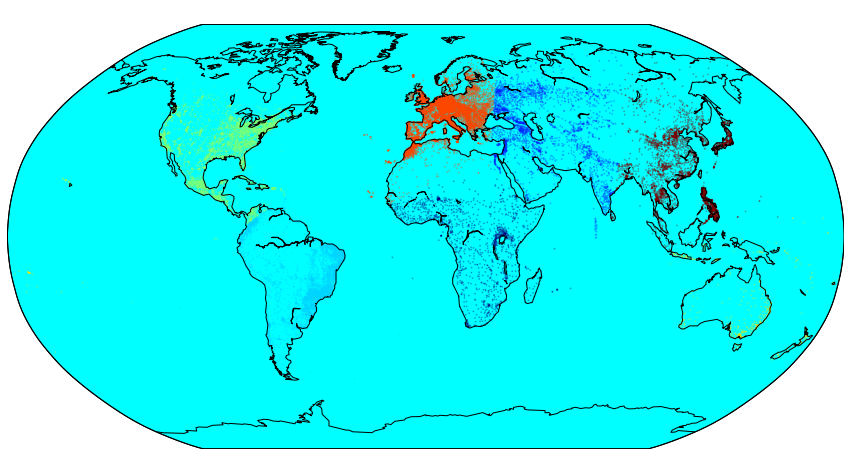

The runtime when k = 15 is 46.00860333442688 second.


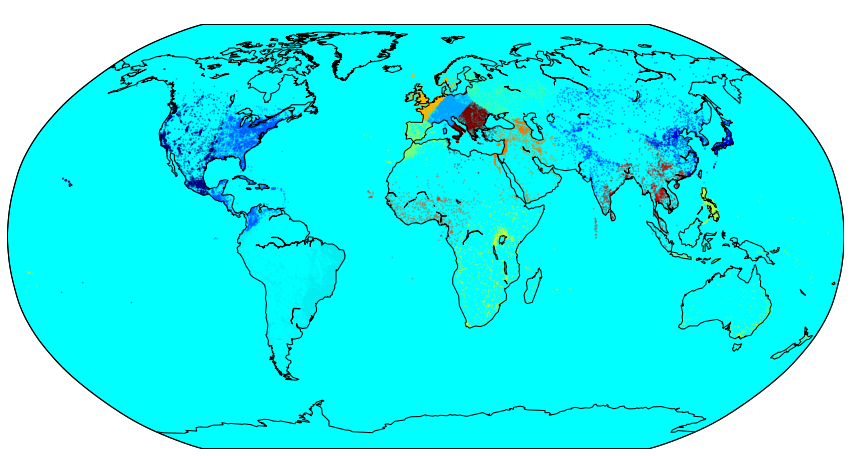

The runtime when k = 5 is 8.253456115722656 second.


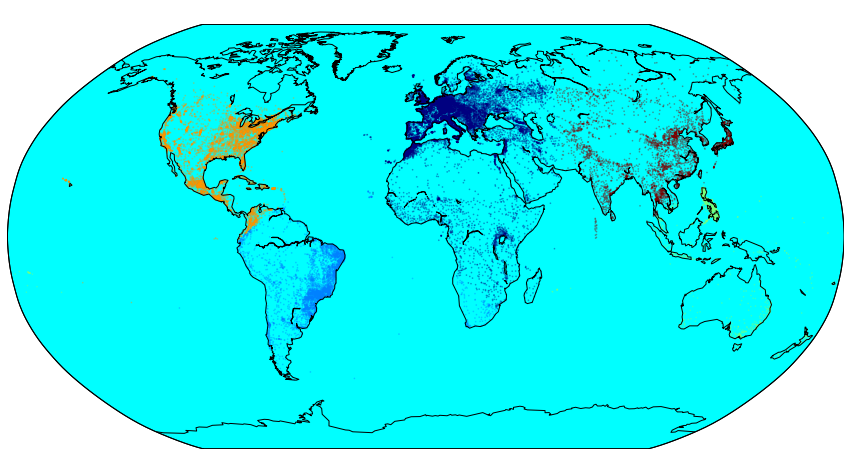

The runtime when k = 7 is 11.118740320205688 second.


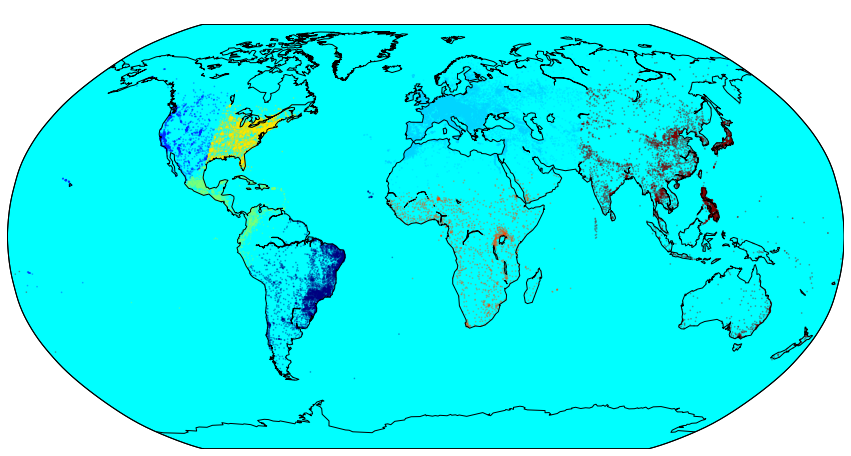

The runtime when k = 15 is 79.00840282440186 second.


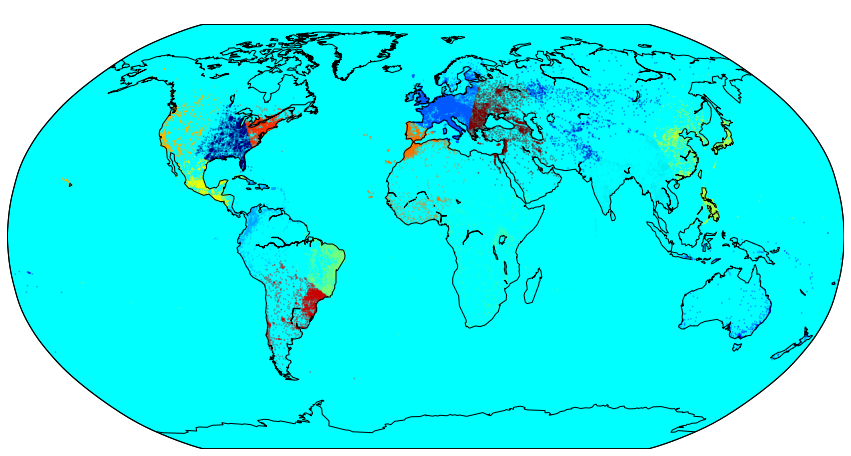

The runtime when k = 5 is 20.97271704673767 second.


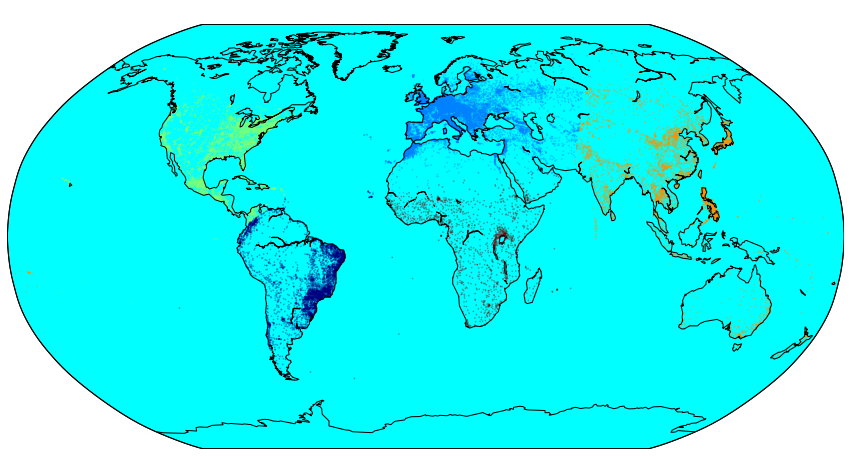

The runtime when k = 7 is 10.720159769058228 second.


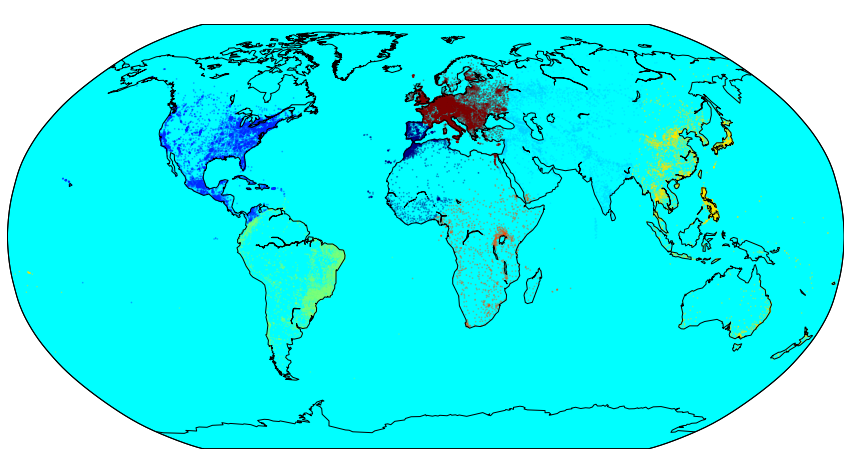

The runtime when k = 15 is 92.73942112922668 second.


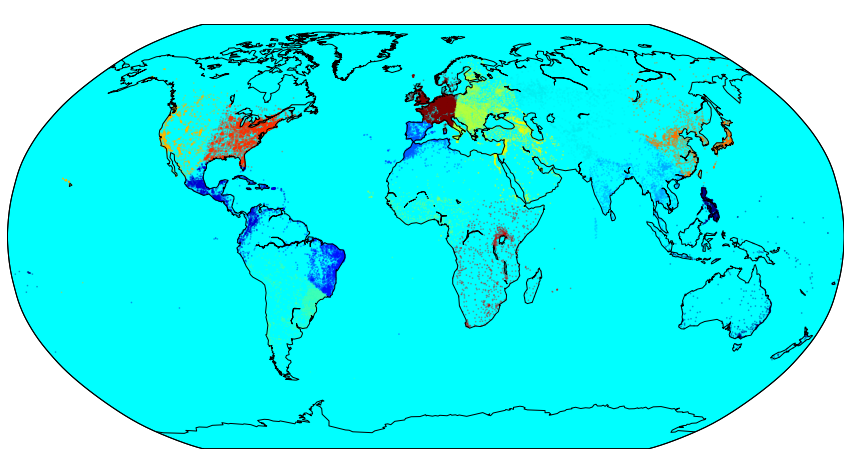

The runtime when k = 5 is 12.92732858657837 second.


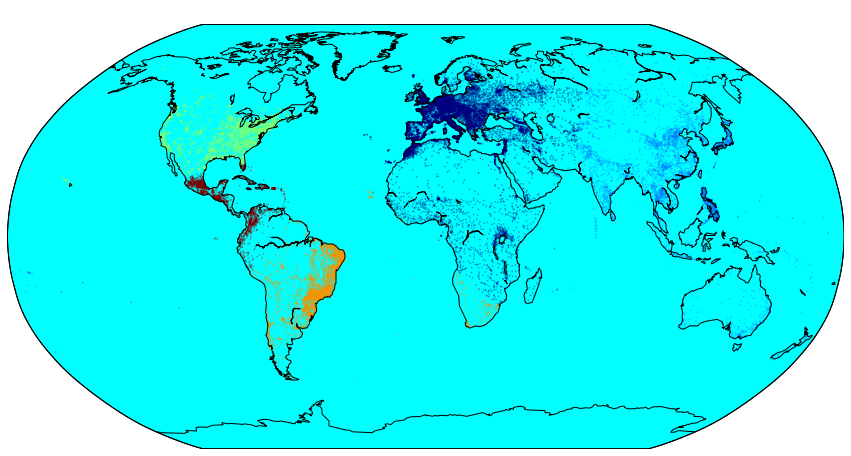

The runtime when k = 7 is 9.806714534759521 second.


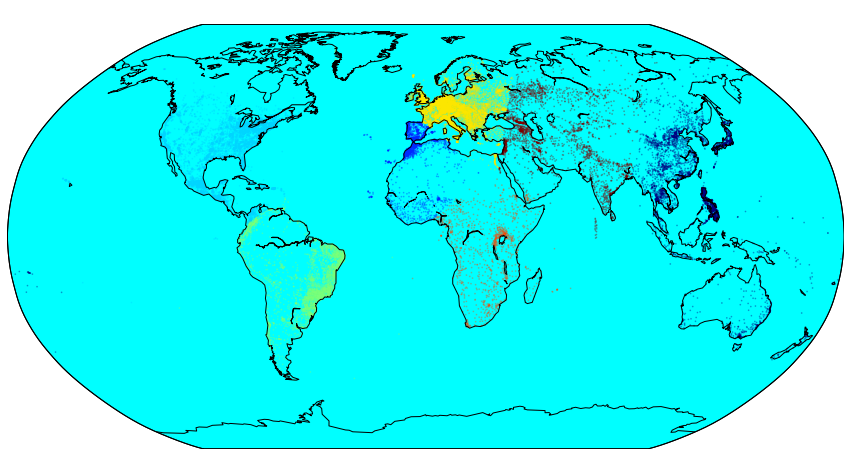

The runtime when k = 15 is 26.53067898750305 second.


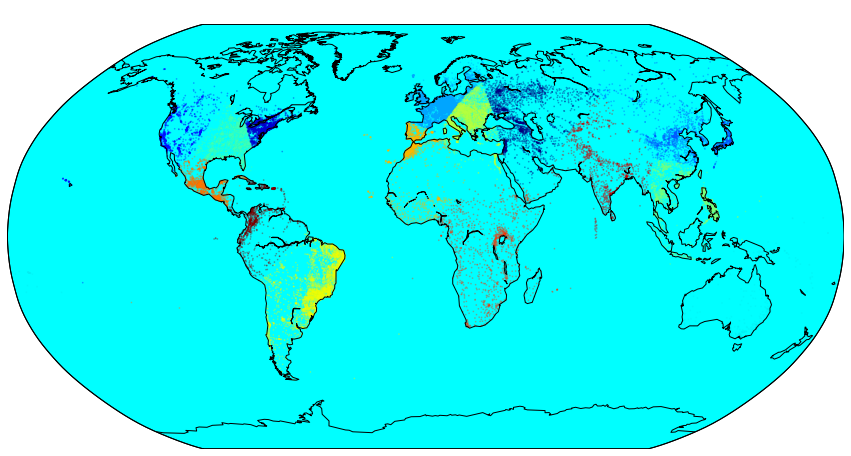

The runtime when k = 5 is 4.182164430618286 second.


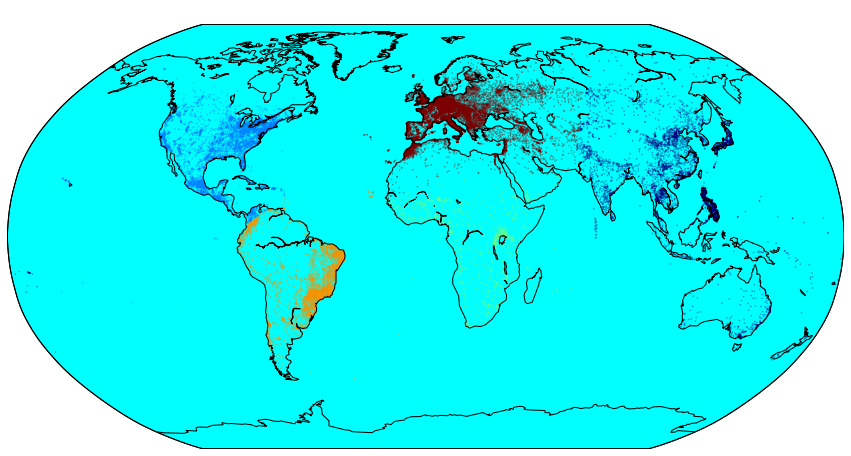

The runtime when k = 7 is 17.308983087539673 second.


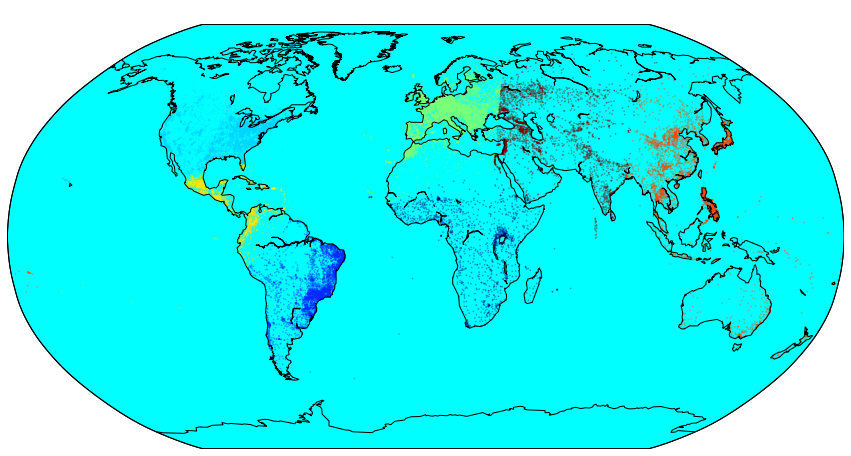

The runtime when k = 15 is 50.660181760787964 second.


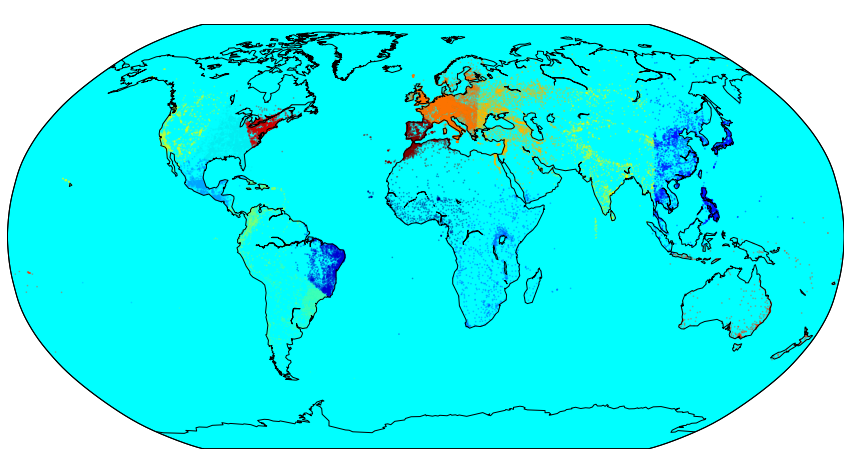

The runtime when k = 5 is 17.73849892616272 second.


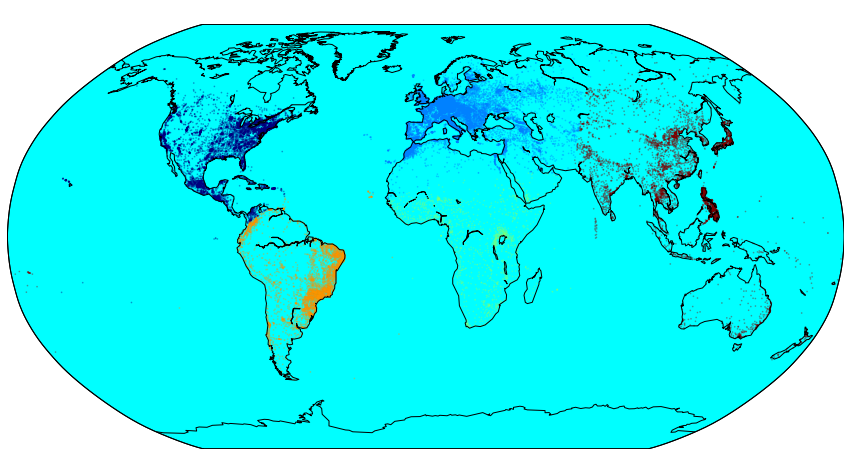

The runtime when k = 7 is 8.489657163619995 second.


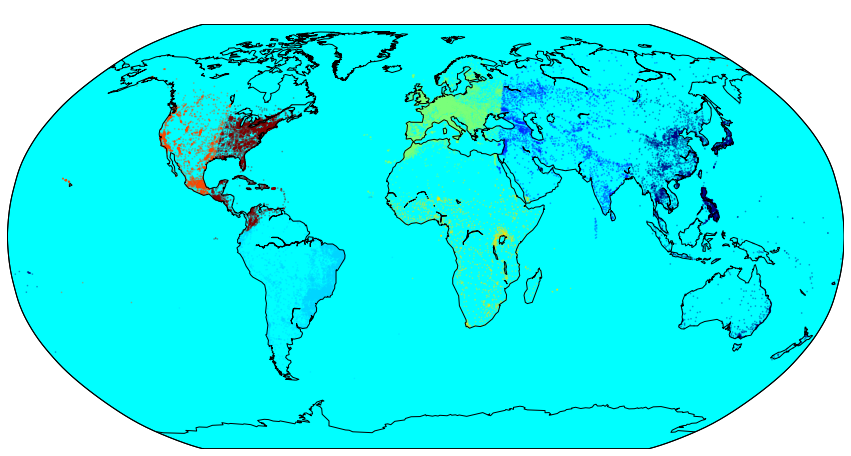

The runtime when k = 15 is 18.2268545627594 second.


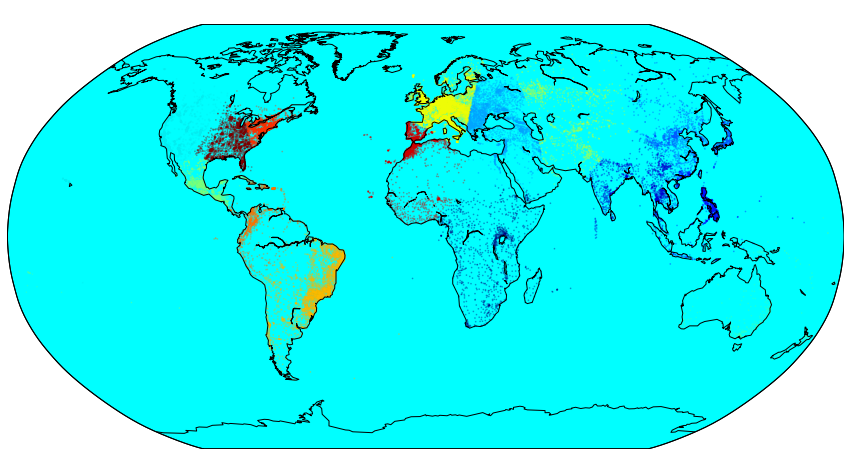

The runtime when k = 5 is 2.4992356300354004 second.


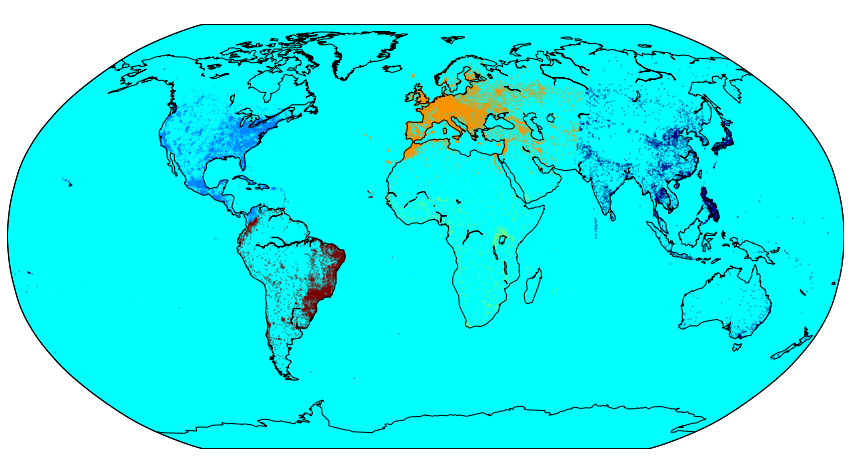

The runtime when k = 7 is 10.41231369972229 second.


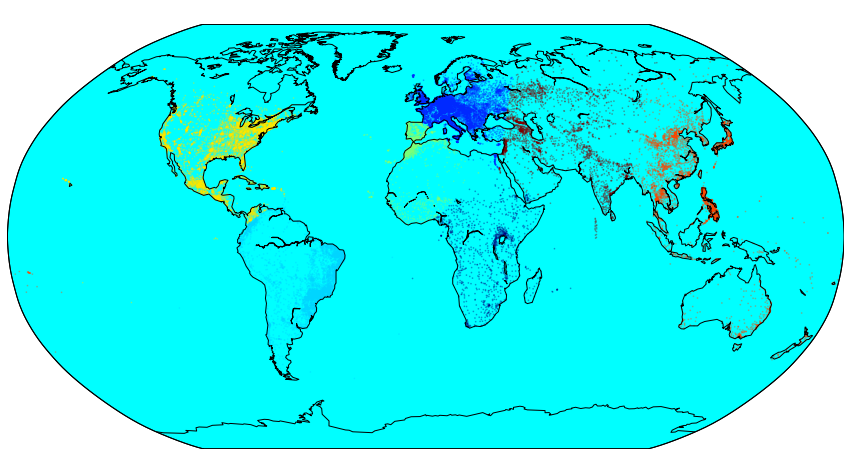

The runtime when k = 15 is 63.2963547706604 second.


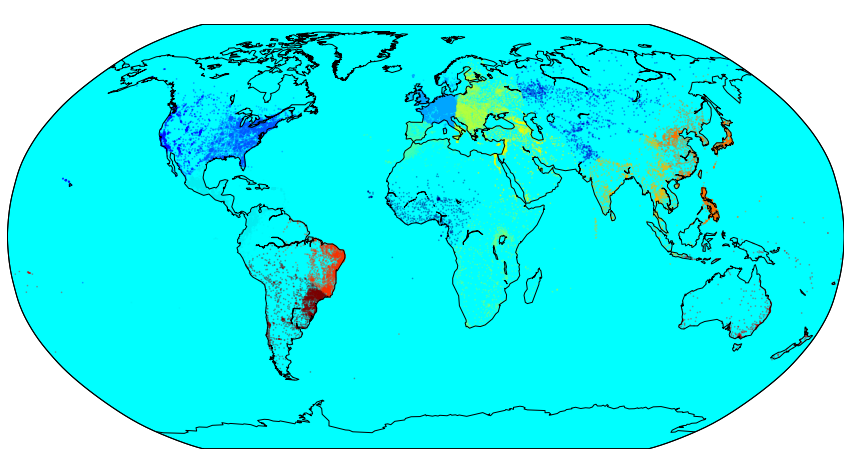

The runtime when k = 5 is 4.943664789199829 second.


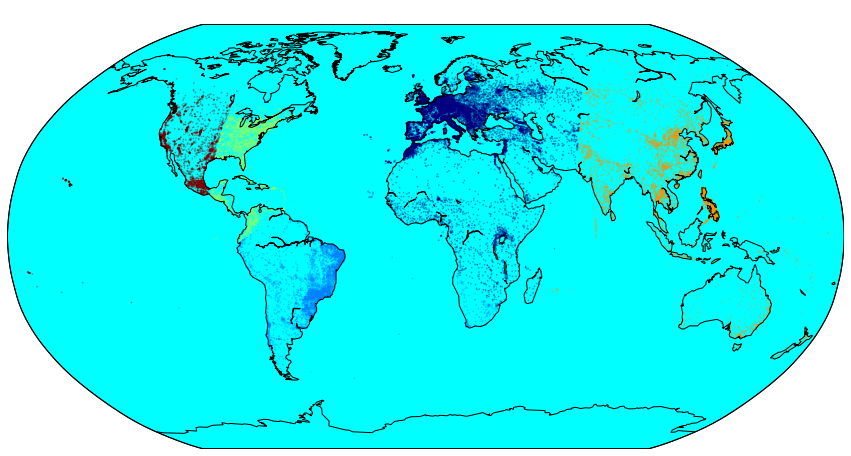

The runtime when k = 7 is 15.573505163192749 second.


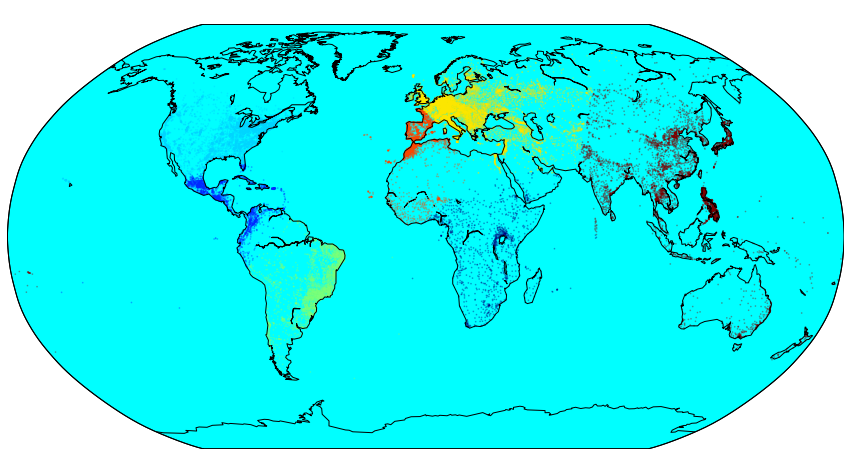

The runtime when k = 15 is 80.53409624099731 second.


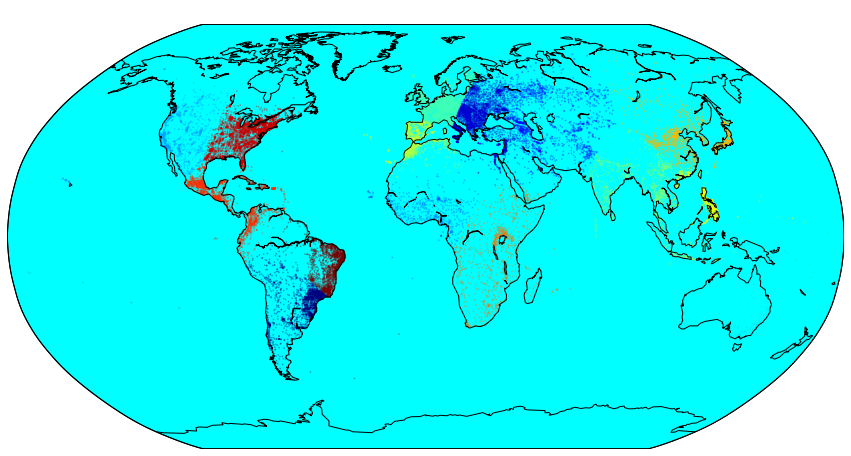

In [83]:
for count in range(10):
    # set k = 5, 7 and 15. find the cluster center and draw the figures.
    cluster_k5 = runtime(5)
    draw_figure(cluster_k5,5)
    cluster_k7 = runtime(7)
    draw_figure(cluster_k7,7)
    cluster_k15 = runtime(15)
    draw_figure(cluster_k15,15)